In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
#We use 1 dimensional arrays due to audio files, we use Conv1D and MaxPooling1D
#Dense is used for connecting the entire neural network
#Flattening is the process of converting all the resultant 1D arrays into a single long continuous linear vector
#A dropout layer is used for regularization where you randomly set some of the dimensions of your input vector to be zero
from keras.models import Model #Used to instantiate a Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from matplotlib import pyplot 
import random
import soundfile as sf

Using TensorFlow backend.


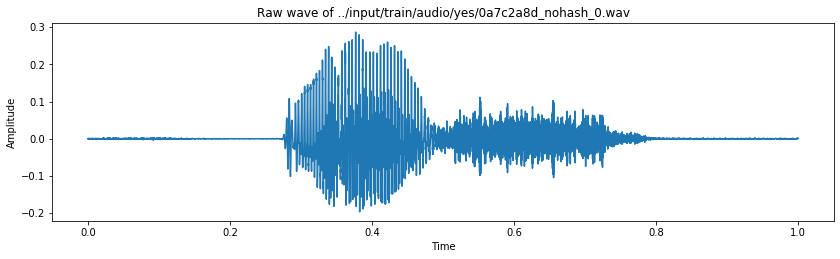

In [5]:
train_audio_path = 'C:\\Users\\Alrayan\\Desktop\\Optability\\AI DC Program\\AIDI-2005-02 - CAPSTONE TERM II\\Kaggle TensorFlow Challenge\\tensorflow-speech-recognition-challenge\\train\\train\\audio'
samples, sample_rate = librosa.load(train_audio_path+'\\yes\\0a7c2a8d_nohash_0.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8)) #FigSize determines the pixels of the plot
ax1 = fig.add_subplot(211) #Subplot grid parameter of 2x1 at the top left of the plot
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/0a7c2a8d_nohash_0.wav')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [6]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [7]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

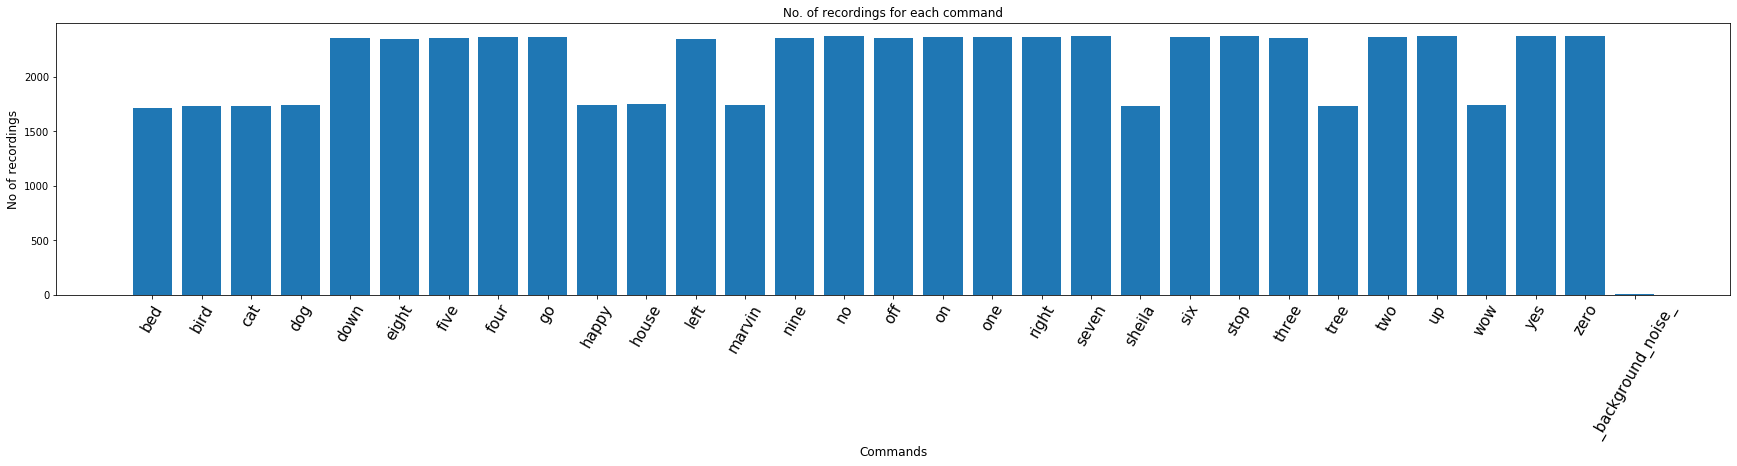

In [8]:
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go", "wow", "house", "happy", "tree", "dog", "cat", "bird", 
        "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

(array([1.2000e+01, 1.8000e+01, 1.6600e+02, 1.4700e+02, 3.4300e+02,
        5.8200e+02, 8.5600e+02, 7.1300e+02, 1.2580e+03, 5.3057e+04]),
 array([0.3715625 , 0.43440625, 0.49725   , 0.56009375, 0.6229375 ,
        0.68578125, 0.748625  , 0.81146875, 0.8743125 , 0.93715625,
        1.        ]),
 <a list of 10 Patch objects>)

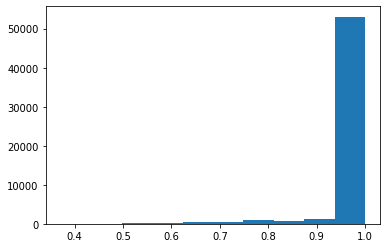

In [9]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [10]:
train_audio_path = 'C:\\Users\\Alrayan\\Desktop\\Optability\\AI DC Program\\AIDI-2005-02 - CAPSTONE TERM II\\Kaggle TensorFlow Challenge\\tensorflow-speech-recognition-challenge\\train\\train\\audio'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go
wow
house
happy
tree
dog
cat
bird
one
two
three
four
five
six
seven
eight
nine
